In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from statistics import mode
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Thejusrini/Machine-Learning-Projects/main/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Preprocessing

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no missing values

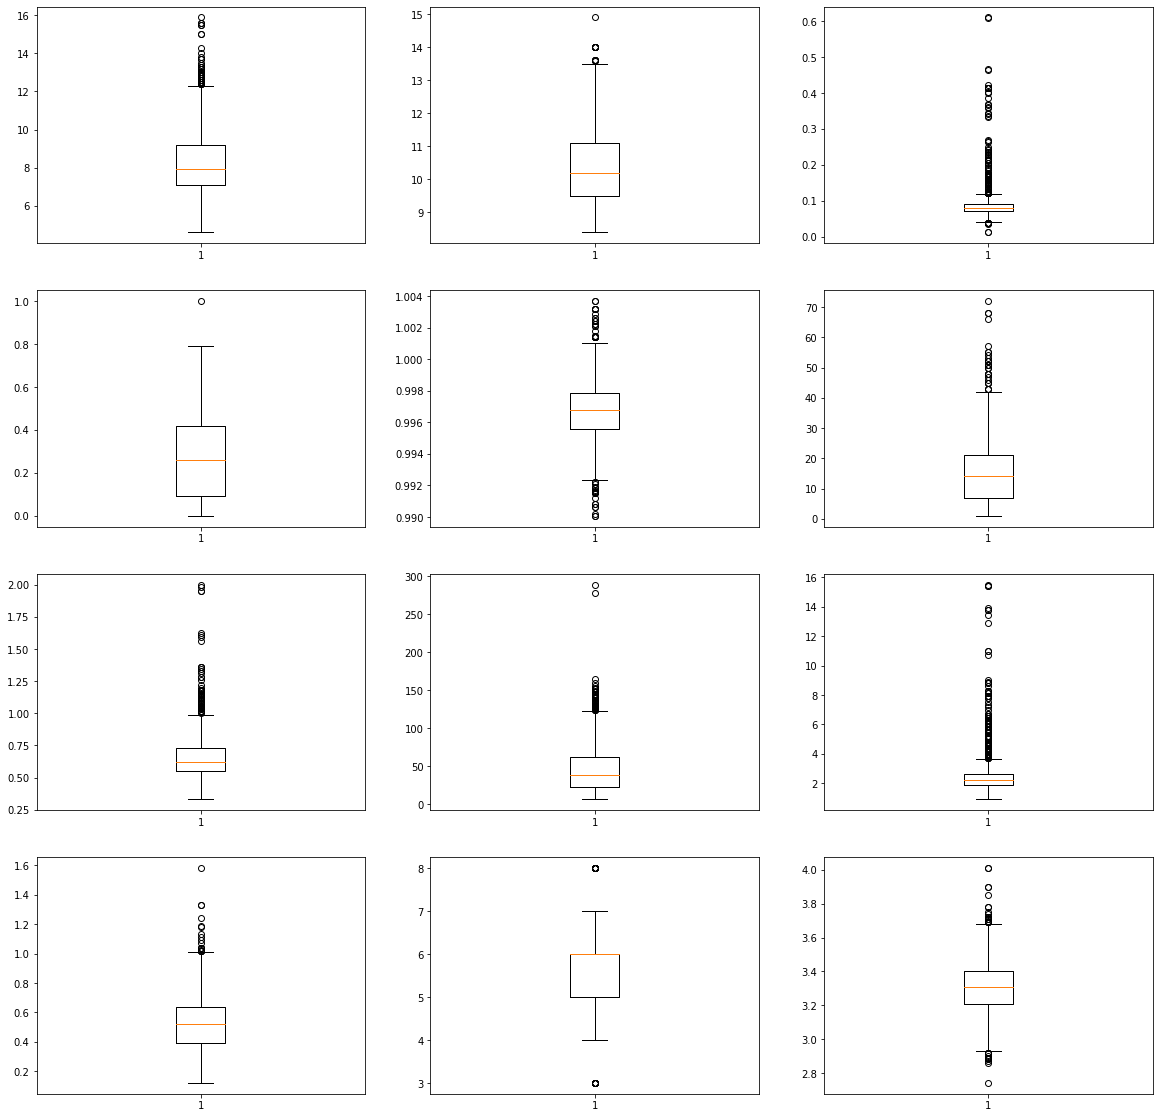

In [ ]:
fig1 ,ax1 = plt.subplots(nrows=4,ncols=3,figsize=(20,20))
ax1[0,0].boxplot(df['fixed acidity'])
ax1[0,1].boxplot(df['alcohol'])
ax1[0,2].boxplot(df['chlorides'])
ax1[1,0].boxplot(df['citric acid'])
ax1[1,1].boxplot(df['density'])
ax1[1,2].boxplot(df['free sulfur dioxide'])
ax1[2,0].boxplot(df['sulphates'])
ax1[2,1].boxplot(df['total sulfur dioxide'])
ax1[2,2].boxplot(df['residual sugar'])
ax1[3,0].boxplot(df['volatile acidity'])
ax1[3,1].boxplot(df['quality'])
ax1[3,2].boxplot(df['pH'])
plt.show(4,3)

In [ ]:
for i in range(len(df.columns)):
  q1=np.percentile(df[df.columns[i]],25)
  q3=np.percentile(df[df.columns[i]],75)
  iqr = q3-q1
  low_b = q1 -(1.5 * iqr )
  up_b = q3 +(1.5 * iqr)
  outliers = []
  for j in df[df.columns[i]]:
    if j > up_b or j < low_b:
      outliers.append(np.where(df[df.columns[i]] == j))
  l= len(outliers)
  while l >= 0:
    df[df.columns[i]].drop(df[df.columns[i]].index[outliers[l-1]],inplace=True,axis=0)
    l -=1


In [ ]:
df.shape

(1599, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
Y = df['quality']
X = df.drop('quality', axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X.std()

1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#Model 1 – Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
X_test


array([[ 2.11448043, -0.76993107,  1.99765822, ..., -0.84951886,
        -0.16611498,  0.35389538],
       [ 1.48249695, -1.16098443,  1.27875175, ..., -0.20159105,
         0.66006809,  1.01096612],
       [-0.35600048,  0.23563472, -0.31311257, ..., -0.97910442,
        -0.69723268, -0.58477711],
       ...,
       [-0.87307788,  1.60432148, -1.39147228, ...,  0.05758008,
        -0.87427191, -0.58477711],
       [ 0.96541954,  0.17976995, -0.15906119, ..., -0.84951886,
        -0.57920652, -0.30317536],
       [-0.70071875,  0.34736425, -1.28877135, ...,  1.54781404,
        -0.75624575, -0.67864436]])

In [ ]:
pred=model.predict(X_test)

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, pred))
      
print ("Accuracy : ",accuracy_score(y_test,pred)*100)
      
print("Report : ", classification_report(y_test, pred))

Confusion Matrix:  [[ 0  0  1  0  0  0]
 [ 0  1  5  3  0  0]
 [ 0  0 92 28  2  0]
 [ 0  0 49 89  9  0]
 [ 0  0  2 22 12  0]
 [ 0  0  0  2  3  0]]
Accuracy :  60.62499999999999
Report :                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.11      0.20         9
           5       0.62      0.75      0.68       122
           6       0.62      0.61      0.61       147
           7       0.46      0.33      0.39        36
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.45      0.30      0.31       320
weighted avg       0.60      0.61      0.59       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv = KFold(n_splits=5)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv);
print('Accuracy: %.3f ' % (mean(scores)));

Accuracy: 0.590 


accuracy of kfold validation is somewhat equal to the accuracy of logistic regression model

#Model 2 – Decision Tree (ID3)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy') 
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred=model.predict(X_test)

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, pred))
      
print ("Accuracy : ",accuracy_score(y_test,pred)*100)
      
print("Report : ", classification_report(y_test, pred))

Confusion Matrix:  [[ 0  0  1  0  0  0]
 [ 2  3  2  1  1  0]
 [ 0  6 78 30  6  2]
 [ 0  7 36 83 18  3]
 [ 0  0  5  7 23  1]
 [ 0  0  0  0  4  1]]
Accuracy :  58.75
Report :                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.19      0.33      0.24         9
           5       0.64      0.64      0.64       122
           6       0.69      0.56      0.62       147
           7       0.44      0.64      0.52        36
           8       0.14      0.20      0.17         5

    accuracy                           0.59       320
   macro avg       0.35      0.40      0.36       320
weighted avg       0.62      0.59      0.60       320



In [ ]:
cv = KFold(n_splits=5)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.577 


accuracy of kfold validation is slightly lesser than decision tree

#Model 3 – Random Forest 



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred=model.predict(X_test)


In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, pred))
      
print ("Accuracy : ",accuracy_score(y_test,pred)*100)
      
print("Report : ", classification_report(y_test, pred))

Confusion Matrix:  [[  0   0   1   0   0   0]
 [  0   0   5   4   0   0]
 [  0   0  98  22   2   0]
 [  0   0  37 103   7   0]
 [  0   0   3   9  24   0]
 [  0   0   0   0   4   1]]
Accuracy :  70.625
Report :                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.68      0.80      0.74       122
           6       0.75      0.70      0.72       147
           7       0.65      0.67      0.66        36
           8       1.00      0.20      0.33         5

    accuracy                           0.71       320
   macro avg       0.51      0.40      0.41       320
weighted avg       0.69      0.71      0.69       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv = KFold(n_splits=5)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.662 


accuracy of kfold validation is lesser than Random forest model

#Model 4 – K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
l=np.sqrt(len(df))
l=np.floor(l)
l

39.0

In [ ]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

In [ ]:
pred=model.predict(X_test)

In [ ]:
print("Confusion Matrix: ",confusion_matrix(y_test, pred))
      
print ("Accuracy : ",accuracy_score(y_test,pred)*100)
      
print("Report : ", classification_report(y_test, pred))

Confusion Matrix:  [[  0   0   1   0   0   0]
 [  0   0   5   4   0   0]
 [  0   0  98  22   2   0]
 [  0   0  37 103   7   0]
 [  0   0   3   9  24   0]
 [  0   0   0   0   4   1]]
Accuracy :  70.625
Report :                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.68      0.80      0.74       122
           6       0.75      0.70      0.72       147
           7       0.65      0.67      0.66        36
           8       1.00      0.20      0.33         5

    accuracy                           0.71       320
   macro avg       0.51      0.40      0.41       320
weighted avg       0.69      0.71      0.69       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv = KFold(n_splits=5)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.667 


accuracy of kfold validation is lesser than KNN model

classifier with higher accuracy in descending order:
1.   random forest and knn
2.   logistic regression
3.   decision tree


ON COMPARISON RANDOM FOREST AND KNN MODEL HAS GOT HIGH ACCURACY 